# Data wrangling

## Goals of this lecture

A *huge* $\%$ of science involves **data wrangling**. 

This could be an entire course on its own, but today we'll focus on:

- What is **data wrangling**? 
- What to do about **missing values**?
- How to **combine** datasets?
- **Tidy data**!
   - What is it?
   - How do we make *our* data tidy?

## Importing relevant libraries

In [1]:
import seaborn as sns ### importing seaborn
import pandas as pd

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## What is data wrangling?

> **Data wrangling** refers to *manipulating*, *reshaping*, or *transforming* a dataset as needed for your goals (e.g., visualization and/or analysis).

- A huge $\%$ of working with data involves "wrangling".
- Includes:
   - "Cleaning" data (missing values, recasting variables, etc.). 
   - Merging/combining different datasets.
   - Reshaping data as needed.

## Dealing with *missing values*

- In practice, **real-world** data is often messy.  
- This includes **missing values**, which take on the value/label `NaN`.
   - `NaN` = "Not a Number".
- [Dealing with `NaN` values is one of the main challenges in CSS!](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

### Loading a dataset with missing values

The [`titanic` dataset](https://www.kaggle.com/c/titanic/data?select=train.csv) contains information about different Titanic passengers and whether they `Survived (1 vs. 0)`. 

- Commonly used as a tutorial for machine learning, regression, and data wrangling.

In [4]:
df_titanic = pd.read_csv("data/wrangling/titanic.csv")
df_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Why is missing data a problem?

If you're unaware of missing data:

- You might be **overestimating** the size of your dataset. 
- You might be **biasing** the results of a visualization or analysis (if missing data are non-randomly distributed).
- You might be **complicating** an analysis.
   - By default, many analysis packages will "drop" missing data––so you need to be aware of whether this is happening.

### How to deal with missing data

1. **Identify** whether and where your data has missing values.  
2. **Analyze** how these missing values are distributed.
3. **Decide** how to handle them.

Not an easy problem––especially step 3!

### Step 1: Identifying missing values

The first step is **identifying** whether and where your data has missing values.

There are several approaches to this:

- Using `.isna`
- Using `.info`
- Using `.isnull`

#### `isna()`

- The `isna()` function tells us whether a given *cell* of a `DataFrame` has a missing value or not (`True` vs. `False`). 
- If we call `isna().any()`, it tells us which *columns* have missing values.

In [9]:
df_titanic.isna().head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False


In [10]:
df_titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

##### Inspecting columns with `nan`

Now we can inspect specific *columns* that have `nan` values.

In [11]:
df_titanic[df_titanic['Age'].isna()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


##### How many `nan`?

If we call `sum` on the `nan` values, we can calculate exactly how many `nan` values are in each column.

In [17]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### `info`

The `info()` function gives us various information about the `DataFrame`, including the number of *not-null* (i.e., non-missing) values in each column.

In [18]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Check-in

How many rows of the `DataFrame` have missing values for `Cabin`? 

In [31]:
### Your code here

#### Solution

In [32]:
### How many? (Quite a few!)
df_titanic[df_titanic['Cabin'].isna()].shape

(687, 13)

#### Visualizing missing values

- Finally, we can *visualize* the rate of missing values across columns using `seaborn.heatmap`.  
  - The dark cells are those with not-null values.
  - The light cells have `nan` values.

<AxesSubplot:>

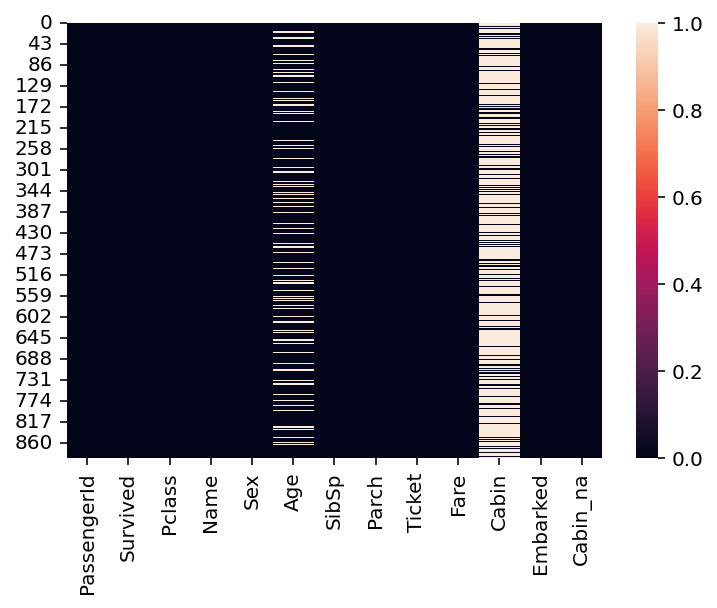

In [42]:
sns.heatmap(df_titanic.isna())

### Step 2: Analyze how the data are distributed

Having *identified* missing data, the next step is determining how those missing data are *distributed*.

#### Is variable $Y$ *different* depending on whether $X$ is `nan`?

One approach is to ask whether some variable of interest (e.g., `Survived`) is *different* depending on whether some *other* variable is `nan`.

In [33]:
### Mean survival for people without data about Cabin info
df_titanic[df_titanic['Cabin'].isna()]['Survived'].mean()

0.29985443959243085

In [30]:
### Mean survival for people *with* data about Cabin info
df_titanic[~df_titanic['Cabin'].isna()]['Survived'].mean()

0.6666666666666666

#### Check-in

What is the mean `Survived` rate for values with a `nan` value for `Age` vs. those with not-null values? How does this compare to the overall `Survived` rate?

In [36]:
### Your code here

#### Solution

In [37]:
### Mean survival for people without data about Age
df_titanic[df_titanic['Age'].isna()]['Survived'].mean()

0.2937853107344633

In [38]:
### Mean survival for people *with* data about Age
df_titanic[~df_titanic['Age'].isna()]['Survived'].mean()

0.4061624649859944

In [39]:
### Mean survival for people overall
df_titanic['Survived'].mean()

0.3838383838383838

#### Additional methods

If you're interested in diving deeper, you can look into the `missingno` library in Python (which must be separately installed).

- [Tutorial using `missingno` on a dataset](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009).
- [Source code for `missingno` library](https://github.com/ResidentMario/missingno). 

### Step 3: Determine what to do!

Having *identified* missing data, you need to determine how to *handle it*.

There are several approaches you can take.

- **Removing** all rows with *any* missing data. 
- **Removing** rows with missing data only when that variable is relevant to the analysis or visualization.
- **Imputing** (i.e., guessing) what values missing data should have.

#### Removing all rows with any missing data

- We can *filter* our `DataFrame` using `dropna`, which will automatically "drop" any rows containing null values.  
- Caution: if you have lots of missing data, this can substantially impact the size of your dataset.

In [43]:
df_filtered = df_titanic.dropna()
df_filtered.shape

(183, 13)

#### Removing all rows with missing data in specific columns

- Here, we specify that we only want to `dropna` for rows that have `nan` in the `Age` column specifically.  
- We still have missing `nan` for `Cabin`, but perhaps that's fine in our case.

In [44]:
df_filtered = df_titanic.dropna(subset = "Age")
df_filtered.shape

(714, 13)

#### Imputing missing data

One of the most complex (and controversial) approaches is to *impute* the values of missing data. 

There are (again) multiple ways to do this:

1. Decide on a **constant** value and assign it to all `nan` values.
   - E.g., assign the `mean` `Age` to all people with `nan` in that column.
2. Try to **guess** the value based on specific characteristics of the data.
   - E.g., based on other characteristics of this person, what is their likely `Age`?
  

##### Imputing a constant value

We can use `fillna` to assign all values with `nan` for `Age` some other value.

In [54]:
## Assign the mean Age to all people with nan for Age
df_titanic['Age_imputed1'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())
## Now let's look at those rows
df_titanic[df_titanic['Age'].isna()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_na,Age_imputed,Age_imputed1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,True,28.0,29.699118
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,True,28.0,29.699118
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,True,28.0,29.699118
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,True,28.0,29.699118
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,True,28.0,29.699118


##### Guessing based on other characteristics

- You can try to *guess* what their `Age` would be, based on other features.
- The more sophisticated version of this is to use **statistical modeling** or using `SimpleImputer` from the `sklearn` library.  
- For now, simply note that `Age` correlates with other features (like `Pclass`).

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

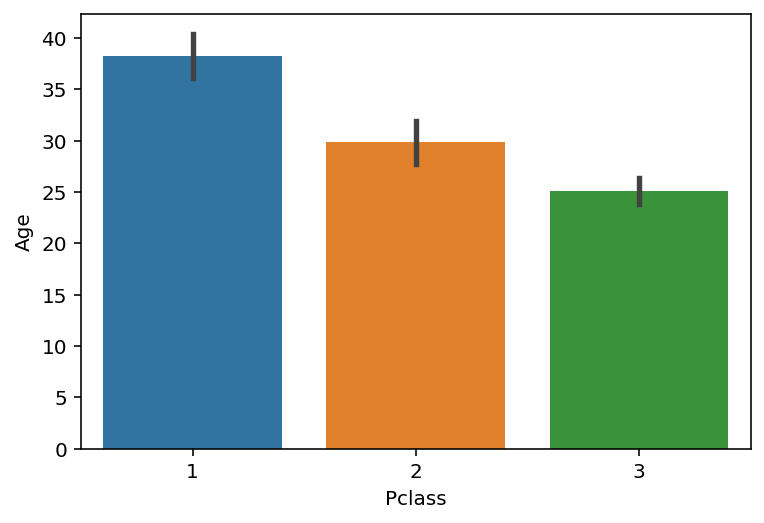

In [55]:
## Passenger Class is correlated with Age
sns.barplot(data = df_titanic, x = 'Pclass', y = 'Age')

#### Check-in

What would happen if you used `fillna` with the `median` `Age` instead of the `mean`? Why would this matter?

In [56]:
### Your code here

#### Solution

The `median` `Age` is slightly lower.

In [57]:
## Assign the median Age to all people with nan for Age
df_titanic['Age_imputed2'] = df_titanic['Age'].fillna(df_titanic['Age'].median())
## Now let's look at those rows
df_titanic[df_titanic['Age'].isna()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_na,Age_imputed,Age_imputed1,Age_imputed2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,True,28.0,29.699118,28.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,True,28.0,29.699118,28.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,True,28.0,29.699118,28.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,True,28.0,29.699118,28.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,True,28.0,29.699118,28.0


## Merging datasets

> **Merging** refers to *combining* different datasets to leverage the power of additional information.

- In Week 1, we discussed this in the context of **data linkage**. 
- Can link datasets as a function of:
   - Shared *time window*. 
   - Shared *identity*.

### Why merge?

- Each dataset contains *limited* information.
   - E.g., `GDP` by `Year`. 
- But **merging** datasets allows us to see how more variables relate and interact.
- Much of social science research involves **locating** datasets and figuring out how to **combine** them.

### How to merge?

In Python, `pandas.merge` allows us to merge two `DataFrame`s on a common column(s).

```python
pd.merge(df1, df2, on = "shared_column")
```

### `merge` in practice

For demonstration, we'll merge two Linguistics datasets:

- One dataset contains information about the **Age of Acquisition** of different English words (Kuperman et al., 2014).
- The other dataset contains information about the **Frequency** and **Concreteness** of English words (Brysbaert et al., 2014).

#### Loading datasets

In [11]:
df_aoa = pd.read_csv("data/wrangling/AoA.csv")
df_aoa.head(1)

,Word,AoA
0,a,2.89


In [16]:
df_conc = pd.read_csv("data/wrangling/concreteness.csv")
df_conc.head(1)

,Word,Concreteness,Frequency,Dom_Pos
0,sled,5.0,149,Adjective


#### Different *kinds* of merging

As we see, the datasets are not the same **size**. This leaves us with a decision to make when merging.

- `inner` join: Do we preserve only the words in *both* datasets?
- `left` join: Do we preserve all the words in one dataset (the "left" one), regardless of whether they occur in the other?
- `right` join: Do we preserve all the words in one dataset (the "right" one), regardless of whether they occur in the other?
- `outer` join: Do we preserve all words in both, leaving empty (`nan`) values where a word only appears in one dataset?

In [17]:
df_aoa.shape

(31124, 2)

In [18]:
df_conc.shape

(28612, 4)

#### `inner` join

- For our purposes, it makes the most sense to use an `inner` join.
- This leaves us with fewer words than occur in *either* dataset.

In [20]:
df_merged = pd.merge(df_aoa, df_conc, on = "Word", how = "inner")
df_merged.head(2)

,Word,AoA,Concreteness,Frequency,Dom_Pos
0,aardvark,9.89,4.68,21,Noun
1,abacus,8.69,4.52,12,Noun


In [21]:
df_merged.shape

(23569, 5)

#### Check-in

What happens if you use a different kind of join, e.g., `outer` or `left`? What do you notice about the `shape` of the resulting `DataFrame`? Do some rows have `nan` values?

In [29]:
### Your code here

#### Solution

In [30]:
df_outer_join = pd.merge(df_aoa, df_conc, on = "Word", how = "outer")
df_outer_join.shape

(36167, 5)

In [35]:
df_outer_join.head(4)

,Word,AoA,Concreteness,Frequency,Dom_Pos
0,a,2.89,NaN,NaN,NaN
1,aardvark,9.89,4.68,21.0,Noun
2,abacus,8.69,4.52,12.0,Noun
3,abalone,12.23,NaN,NaN,NaN


### Why `merge` is so useful

Now that we've merged our datasets, we can look at how variables *across* them relate to each other.

<AxesSubplot:xlabel='Concreteness', ylabel='AoA'>

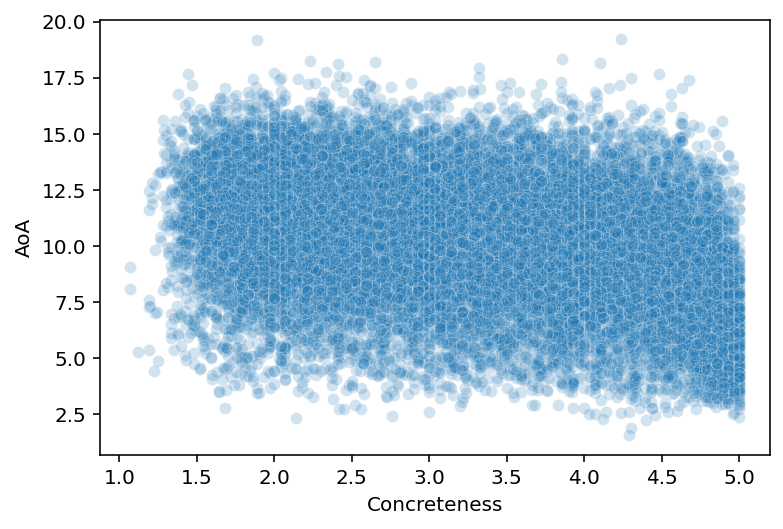

In [66]:
sns.scatterplot(data = df_merged, x = 'Concreteness',
                y = 'AoA', alpha = .2 )

## Reshaping data

> **Reshaping data** involves transforming it from one format (e.g., "wide") to another format (e.g., "long"), to make it more amenable to visualization and analysis.

Often, we need to make our data **tidy**.

### What is tidy data?

**Tidy data** is a particular way of formatting data, in which:

1. Each variable forms a column (e.g., `GDP`).
2. Each observation forms a row (e.g., a `country`).
3. Each type of observational unit forms a table (**tabular data**!).

Originally developed by Hadley Wickham, creator of the `tidyverse` in R.

### Tidy vs. "untidy" data

Now let's see some examples of **tidy** vs. **untidy** data.

Keep in mind:

- These datasets all contain the **same information**, just in different **formats**.
- "Untidy" data can be useful for other things, e.g., presenting in a paper.
- The key goal of tidy data is that **each row represents an observation**.

#### Tidy data

**Check-in**: Why is this data considered tidy?

In [51]:
df_tidy = pd.read_csv("data/wrangling/tidy.csv")
df_tidy

,ppt,condition,rt
0,john,Congruent,200
1,john,Incongruent,250
2,mary,Congruent,178
3,mary,Incongruent,195


#### Untidy data 1

**Check-in**: Why is this data *not* considered tidy?

In [52]:
df_messy1 = pd.read_csv("data/wrangling/messy1.csv")
df_messy1

,john,mary,condition
0,200,178,Congruent
1,250,195,Incongruent


#### Untidy data 2

**Check-in**: Why is this data *not* considered tidy?

In [53]:
df_messy2 = pd.read_csv("data/wrangling/messy2.csv")
df_messy2

,congruent,incongruent,ppt
0,200,250,john
1,178,195,mary


### Making data tidy

Fortunately, `pandas` makes it possible to turn an "untidy" `DataFrame` into a **tidy** one.

The key function here is `pandas.melt`.

```python
pd.melt(df, ### Dataframe
        id_vars = [...], ### what are the identifying columns?
        var_name = ..., ### name for variable grouping over columns
        value_name = ..., ### name for the value this variable takes on
```

If this seems **abstract**, don't worry––it'll become clearer with examples!


#### Using `pd.melt`

- Let's start with our first messy `DataFrame`.
- Has columns for each `ppt`, which contain info about `rt`.

In [54]:
df_messy1

,john,mary,condition
0,200,178,Congruent
1,250,195,Incongruent


In [58]:
pd.melt(df_messy1, id_vars = 'condition', ### condition is our ID variable
       var_name = 'ppt', ### new row for each ppt observation
       value_name = 'rt') ### label for the info we have about each ppt

,condition,ppt,rt
0,Congruent,john,200
1,Incongruent,john,250
2,Congruent,mary,178
3,Incongruent,mary,195


#### Check-in

Try to use `pd.melt` to turn `df_messy2` into a **tidy** `DataFrame`.

**Hint**: Think about the existing structure of the `DataFrame`––how is data grouped––and what the `id_vars` would be.

In [60]:
df_messy2

,congruent,incongruent,ppt
0,200,250,john
1,178,195,mary


In [61]:
### Your code here

#### Solution

In [63]:
pd.melt(df_messy2, id_vars = 'ppt', ### here, ppt is our ID variable
       var_name = 'condition', ### new row for each ppt observation
       value_name = 'rt') ### label for the info we have about each ppt

,ppt,condition,rt
0,john,congruent,200
1,mary,congruent,178
2,john,incongruent,250
3,mary,incongruent,195


### Hands-on: a real dataset

Now, we'll turn to a real dataset, which Timothy Lee, creator of [Full Stack Economics](https://www.fullstackeconomics.com/), compiled and shared with me.

In [59]:
df_work = pd.read_csv("data/viz/missing_work.csv")
df_work.head(5)

,Year,Child care problems,Maternity or paternity leave,Other family or personal obligations,Illness or injury,Vacation,Month
0,2012,18,313,246,899,1701,10
1,2012,35,278,230,880,1299,11
2,2012,13,245,246,944,1005,12
3,2013,14,257,250,1202,1552,1
4,2013,27,258,276,1079,1305,2


#### Check-in

Is this dataset tidy? How could we make it tidy, if not––i.e., if we wanted each *row* to be a single observation corresponding to one of the *reasons* for missing work?

In [61]:
### Your code here

#### Solution

In [63]:
df_melted = pd.melt(df_work, id_vars = ['Year', 'Month'],
                    var_name = "Reason",
                    value_name = "Days Missed")
df_melted.head(2)

,Year,Month,Reason,Days Missed
0,2012,10,Child care problems,18
1,2012,11,Child care problems,35


### Why tidy data is useful

Finally, let's use this dataset to recreate a graph from [FullStackEconomics](https://www.fullstackeconomics.com/).

#### Original graph

![title](img/work_pandemic.png)

#### Check-in

As a first-pass approach, what tools from `seaborn` could you use to recreate this plot?

In [67]:
### Your code here

#### Solution

This is okay, but not really what we want. This is grouping it by `Year`. But we want to group by *both* `Year` and `Month`.

<AxesSubplot:xlabel='Year', ylabel='Days Missed'>

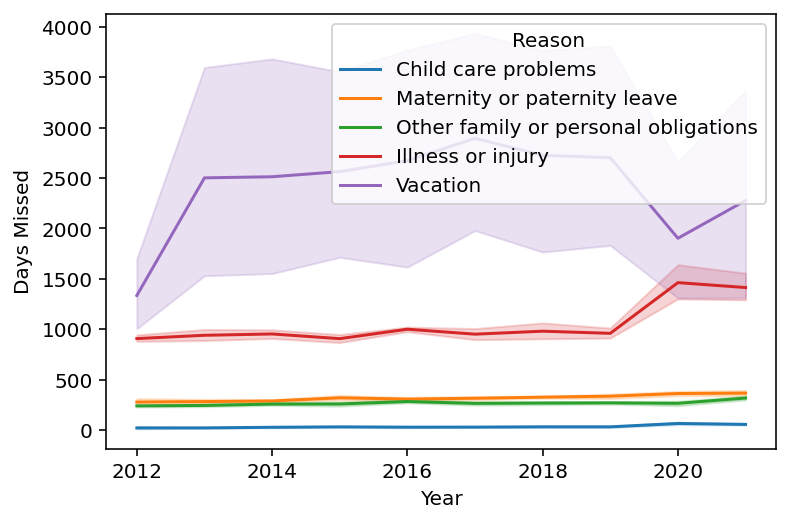

In [69]:
sns.lineplot(data = df_melted, x = 'Year', y = 'Days Missed', hue = "Reason")

#### Using `datetime`

- Let's make a new column called `date`, which combines the `Month` and `Year`.
- Then we can use `pd.to_datetime` to turn that into a custom `pandas` representation.

In [74]:
## First, let's concatenate each month and year into a single string
df_melted['date'] = df_melted.apply(lambda row: str(row['Month']) + '-' + str(row['Year']), axis = 1)
df_melted.head(2)

,Year,Month,Reason,Days Missed,date,datetime
0,2012,10,Child care problems,18,10-2012,2012-10-01
1,2012,11,Child care problems,35,11-2012,2012-11-01


In [75]:
## Now, let's create a new "datetime" column using the `pd.to_datetime` function
df_melted['datetime'] = pd.to_datetime(df_melted['date'])
df_melted.head(2)

,Year,Month,Reason,Days Missed,date,datetime
0,2012,10,Child care problems,18,10-2012,2012-10-01
1,2012,11,Child care problems,35,11-2012,2012-11-01


#### Plotting again

Much better!

<AxesSubplot:xlabel='datetime', ylabel='Days Missed'>

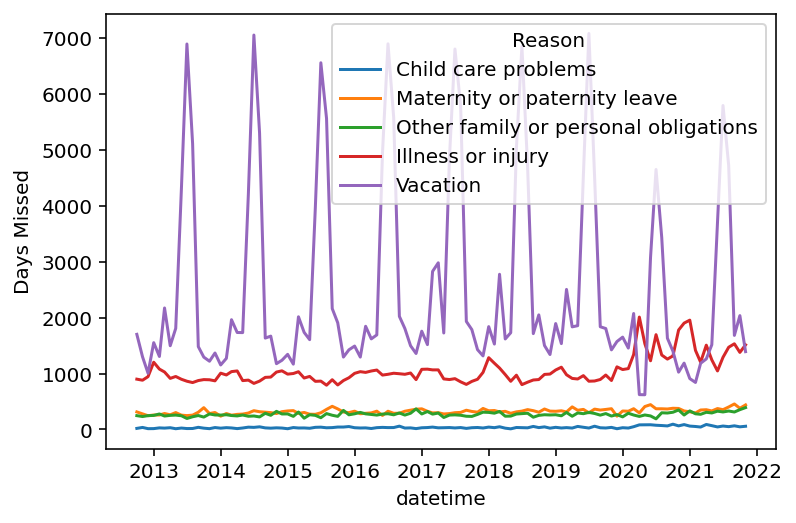

In [76]:
sns.lineplot(data = df_melted, x = "datetime", y = "Days Missed", hue = "Reason")

## Conclusion

This was an introduction to **data wrangling**.

- As noted, data wrangling is a hugely important topic––and could constitute an entire class.
- But today, we've focused on:
   - Identifying and addressing missing data.  
   - Merging datasets.  
   - Making data tidy.